LANGRAPH SIMPLE FLOW

In [14]:
%pip install --quiet -U langgraph

Note: you may need to restart the kernel to use updated packages.


First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [15]:
from typing_extensions import Dict

class State(Dict):
    graph_state: str

Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [16]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

Edges connect the nodes.

Normal Edges are used if you want to always go from, for example, node_1 to node_2.

Conditional Edges are used if you want to optionally route between nodes.

Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [17]:
import random
from typing import Literal

def decide(state: State) -> Literal["node_2", "node_3"]:
    print("---Decision---")
    # Randomly decide to go to node_2 or node_3
    return random.choice(["node_2", "node_3"])

Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

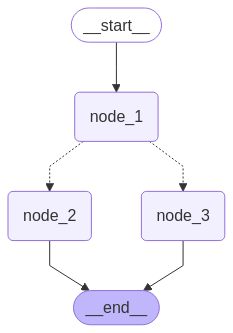

In [18]:
from IPython.display import display,Image
from langgraph.graph import StateGraph, START, END

# Create a state graph  
builder= StateGraph(State)
builder.add_node('node_1', node_1)
builder.add_node('node_2', node_2)
builder.add_node('node_3', node_3)


builder.add_edge(START, 'node_1')
builder.add_conditional_edges('node_1',decide)
builder.add_edge('node_2', END)
builder.add_edge('node_3', END)


graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke({"graph_state": "Hi, This is Vipul,"})

---Node 1---
---Decision---
---Node 3---


{'graph_state': 'Hi, This is Vipul, I am sad!'}